![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
import torchvision.datasets

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 419088868.95it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 46879138.48it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136072629.54it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16963961.50it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

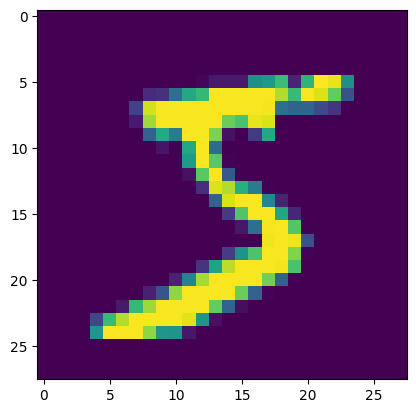

tensor(5)


In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [6]:
X_train.shape

torch.Size([60000, 28, 28])

In [7]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [13]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [19]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [21]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [22]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9756)
tensor(0.9807)
tensor(0.9864)
tensor(0.9841)
tensor(0.9896)
tensor(0.9878)
tensor(0.9882)
tensor(0.9872)
tensor(0.9859)
tensor(0.9887)
tensor(0.9888)
tensor(0.9892)
tensor(0.9869)
tensor(0.9894)
tensor(0.9880)
tensor(0.9881)
tensor(0.9886)
tensor(0.9885)
tensor(0.9882)
tensor(0.9888)
tensor(0.9879)
tensor(0.9871)
tensor(0.9874)
tensor(0.9884)
tensor(0.9880)
tensor(0.9872)
tensor(0.9894)
tensor(0.9898)
tensor(0.9867)
tensor(0.9863)
tensor(0.9887)
tensor(0.9892)
tensor(0.9884)
tensor(0.9896)
tensor(0.9883)
tensor(0.9903)
tensor(0.9869)
tensor(0.9867)
tensor(0.9887)
tensor(0.9896)
tensor(0.9883)
tensor(0.9879)
tensor(0.9903)
tensor(0.9864)
tensor(0.9886)
tensor(0.9893)
tensor(0.9911)
tensor(0.9913)
tensor(0.9873)
tensor(0.9888)
tensor(0.9885)
tensor(0.9902)
tensor(0.9908)
tensor(0.9848)
tensor(0.9871)
tensor(0.9843)
tensor(0.9867)
tensor(0.9886)
tensor(0.9890)
tensor(0.9888)
tensor(0.9888)
tensor(0.9886)
tensor(0.9891)
tensor(0.9897)
tensor(0.9876)
tensor(0.9863)
tensor(0.9

In [24]:
lenet5.forward(X_test).argmax(dim=1)

tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0')

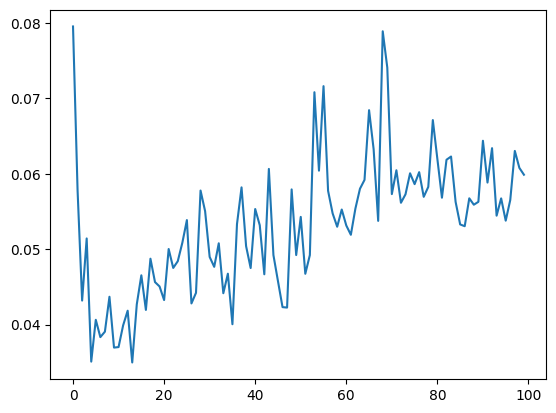

In [25]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);

In [15]:
class LeNet_adv(torch.nn.Module):
    def __init__(self):
        super(LeNet_adv, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0) # скорее всего нужен kernel_size=5 
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet = LeNet_adv()

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet = lenet.to(device)

In [17]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr=3.0e-4)

In [18]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9754)
tensor(0.9819)
tensor(0.9860)
tensor(0.9826)
tensor(0.9872)
tensor(0.9885)
tensor(0.9889)
tensor(0.9896)
tensor(0.9898)
tensor(0.9888)
tensor(0.9908)
tensor(0.9871)
tensor(0.9885)
tensor(0.9895)
tensor(0.9879)
tensor(0.9898)
tensor(0.9891)
tensor(0.9897)
tensor(0.9904)
tensor(0.9891)
tensor(0.9891)
tensor(0.9883)
tensor(0.9883)
tensor(0.9902)
tensor(0.9887)
tensor(0.9903)
tensor(0.9885)
tensor(0.9888)
tensor(0.9907)
tensor(0.9896)
tensor(0.9916)
tensor(0.9892)
tensor(0.9896)
tensor(0.9901)
tensor(0.9909)
tensor(0.9920)
tensor(0.9905)
tensor(0.9904)
tensor(0.9904)
tensor(0.9902)
tensor(0.9904)
tensor(0.9886)
tensor(0.9888)
tensor(0.9897)
tensor(0.9904)
tensor(0.9896)
tensor(0.9919)
tensor(0.9913)
tensor(0.9908)
tensor(0.9910)
tensor(0.9922)
tensor(0.9922)
tensor(0.9925)
tensor(0.9925)
tensor(0.9925)
tensor(0.9924)
tensor(0.9926)
tensor(0.9926)
tensor(0.9926)
tensor(0.9928)
tensor(0.9928)
tensor(0.9929)
tensor(0.9928)
tensor(0.9932)
tensor(0.9933)
tensor(0.9930)
tensor(0.9